In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

plt.rcParams["figure.figsize"] = (20,15)

In [29]:
df = pd.read_csv("cleanedUber.csv", index_col=0)
df.columns = ['Merge', 'Name', 'Delivery', 'Address', 'Food_type', 'Rating',
       'Reviews', 'Menu', 'Average_price', 'Dollar_signs', 'Cuisine']

In [30]:
df.head(10)

,Merge,Name,Delivery,Address,Food_type,Rating,Reviews,Menu,Average_price,Dollar_signs,Cuisine
0,tamjai yunnan mixian,譚仔雲南米線 tamjai yunnan mixian (利都樓),19.0,"177-191a King'S Road, Fortress Hill, North Poi...",$ • Cantonese\n • \nChinese\n • \nFast Food,30–40 Min,4.6,"['(豬肚) 蜀香肚絲', '米線+一餸', '(過) 過橋米線套餐', '(小土) 湖南土...",34,1.0,"['Cantonese', 'Chinese', 'Fast Food']"
1,元祖三上大喜屋,元祖三上大喜屋 (tin hau),14.0,"17 Tsing Fung Street, G/F, Causeway Bay, Hong ...",$$ • Japanese\n • \nAllergy friendly\n • \nFam...,15–25 Min,4.3,"['和風牛肉丼汁飯 Gyu Don', '吉列豬扒咖喱飯 Curry Rice with C...",45,2.0,"['Japanese', 'Allergy friendly', 'Family frien..."
2,sour and spicy noodle,傷心酸辣粉 sour and spicy noodle (north point),19.0,"233 Electric Rd, North Point, Hong Kong, Shop ...",$ • Chinese,30–40 Min,4.2,"['單人套餐 Set for One', '傷心酸辣粉 Hot and Sour Noodl...",77,1.0,['Chinese']
3,mcdonald's,mcdonald's 麥當勞 (tung lo wan road),24.0,"11 Tung Lo Wan Rd, Hong Kong, 1A,\n • \nMore info",$ • Fast Food,15–25 Min,4.3,"['', '', '', '', '', '', '', '', '', '', '', '...",40,1.0,['Fast Food']
4,pho 5,火五越式牛肉粉專門店 pho 5 (tin hau),14.0,"17 Tsing Fung Street, G/F, Causeway Bay, Hong ...",$$ • Vietnamese\n • \nAllergy friendly\n • \nF...,20–30 Min,4.3,"['凍青檸梳打 Iced Lime Soda', '黃金脆魚皮 Crunchy Fish S...",48,2.0,"['Vietnamese', 'Allergy friendly', 'Family fri..."
5,nam kee spring roll noodle co. ltd,南記粉麵 nam kee spring roll noodle co. ltd (cause...,24.0,"96 Percival St, Causeway Bay, Hong Kong, Shop ...",$ • Cantonese,20–30 Min,4.5,"['辣爽爽肥牛 Spicy Beef Chuck and Blade', '招牌辣豬肉米線 ...",71,1.0,['Cantonese']
6,subway,subway (fortress hill),19.0,"218 Electric Rd, North Point, Hong Kong, SHOP ...",$$ • Fast Food\n • \nWestern\n • \nVegan,30–40 Min,4.6,"['Roast Chicken and Avocado Subs 燒雞胸肉與牛油果潛艇堡',...",44,2.0,"['Fast Food', 'Western', 'Vegan']"
7,中村屋 sushi nakamuraya,中村屋 sushi nakamuraya,NaN,"48 Electric Rd, G/F, Golden Court,\n • \nMore ...",$ • Japanese\n • \nFamily friendly,35–45 Min,4.9,"['二色丼 Mixed Sashimi Donburi', '鰻魚壽司 Grilled Ee...",60,1.0,"['Japanese', 'Family friendly']"
8,肯德基 kfc,肯德基 kfc (英皇道),19.0,"147-151 King’s Road, Fortress Hill, Hong Kong,...",$ • Fast Food\n • \nAmerican,35–45 Min,4.1,['KFC 精選 1 人餐 (A) KFC Privilege Individual Mea...,138,1.0,"['Fast Food', 'American']"
9,jiu fen full,九份飽 jiu fen full (蜆殼街 shell street),19.0,"Universal Commercial House, 4 Shell St, Causew...",$$ • Taiwanese\n • \nFamily friendly,35–45 Min,4.5,"['紅燒牛肉麵 Braised Beef with Noodles', '香酥雞扒滷肉飯 C...",29,2.0,"['Taiwanese', 'Family friendly']"


In [31]:
df.columns

Index(['Merge', 'Name', 'Delivery', 'Address', 'Food_type', 'Rating',
       'Reviews', 'Menu', 'Average_price', 'Dollar_signs', 'Cuisine'],
      dtype='object')

In [32]:
plotdf = df[["Dollar_signs","Average_price"]].sort_values(by="Dollar_signs")
plotdf = plotdf[2:]

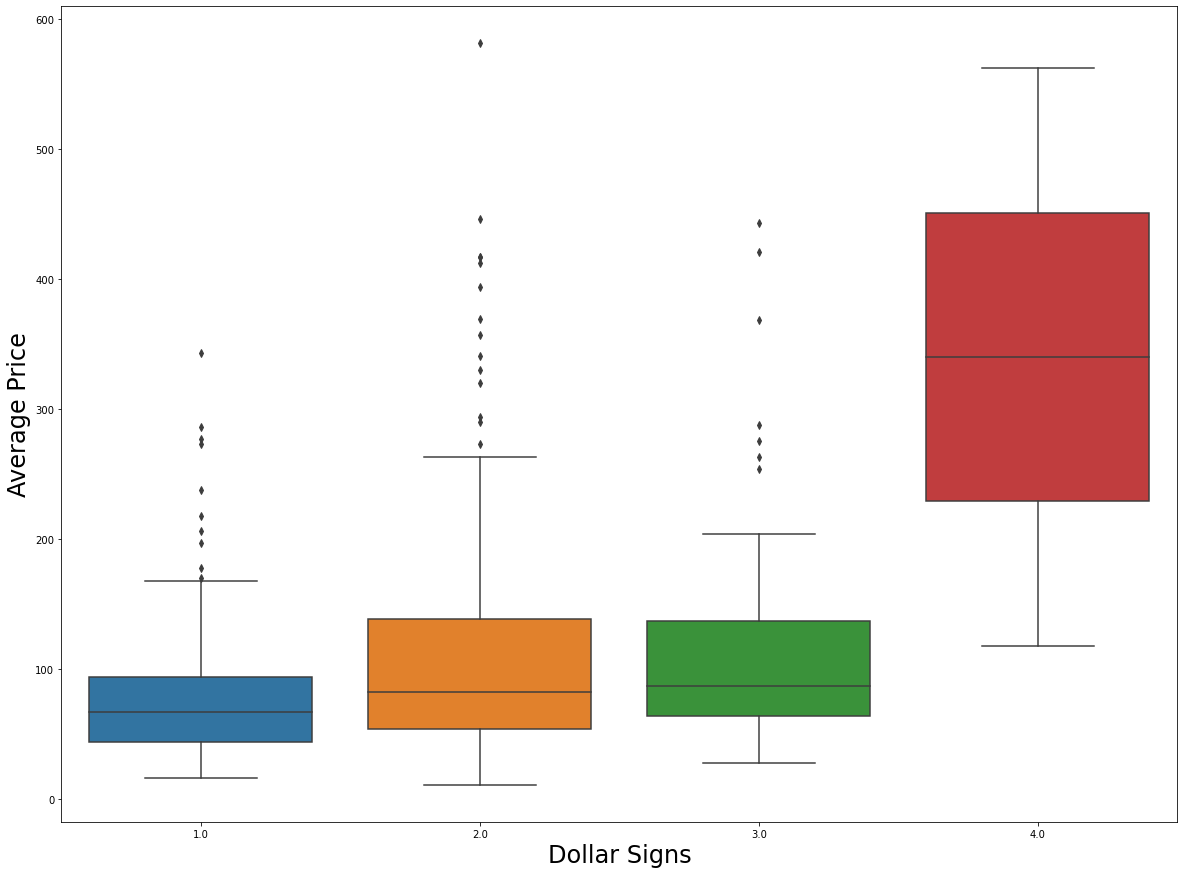

In [33]:
sns.boxplot(data=plotdf, x="Dollar_signs", y="Average_price")

plt.xlabel("Dollar Signs",fontsize=24)
plt.ylabel("Average Price",fontsize=24)


plt.savefig("./figures/Dollarsign_vs_AveragePrice")

In [34]:
# sns.boxplot(data=df, x="Reviews", y="Ratings")

# plt.xlabel("Reviews",fontsize=24)
# plt.ylabel("Ratings",fontsize=24)

df.Reviews = df.Reviews.apply(lambda x: re.sub("\(","",x) if isinstance(x,str) else x)
df.Reviews = df.Reviews.apply(lambda x: re.sub("\)","",x) if isinstance(x,str) else x)
df.Reviews = df.Reviews.apply(lambda x: re.sub("\+","",x) if isinstance(x,str) else x)



In [35]:
df.Reviews = df.Reviews.apply(lambda x: 0 if isinstance(x,float) else x)

In [36]:
df_review = df[df.Reviews != 0]

In [37]:
df_review.Reviews = df_review.Reviews.apply(lambda x: float(x))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [38]:
df_review["binned"] = pd.qcut(df_review['Reviews'], q=8)

<ipython-input-38-de7b34554165>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review["binned"] = pd.qcut(df_review['Reviews'], q=8)


In [39]:
df_review.binned.value_counts()

(2.399, 4.2]     41
(4.6, 4.8]       37
(4.4, 4.5]       27
(4.5, 4.6]       26
(13.0, 100.0]    25
(4.3, 4.4]       24
(4.8, 13.0]      18
(4.2, 4.3]       17
Name: binned, dtype: int64

In [40]:
sns.boxplot(data=df_review, x="binned", y="Ratings")

plt.xlabel("No of Reviews",fontsize=24)
plt.ylabel("Ratings",fontsize=24)

plt.savefig("./figures/ReviewCounts_Vs_Ratings", bbox_inches='tight')

ValueError: Could not interpret input 'Ratings'

In [ ]:
df_cuisine = df.Cuisine_single.value_counts()[:10]
df_cuisine = df_cuisine.reset_index()
df_cuisine

In [ ]:
sns.barplot(data=df_cuisine, x="index", y="Cuisine_single")

plt.xlabel("Cuisine",fontsize=24)
plt.ylabel("Counts",fontsize=24)
plt.xticks(fontsize=18, rotation=20)

plt.savefig("./figures/cuisineCounts", bbox_inches='tight')

In [ ]:
df.Delivery.value_counts()

In [ ]:
df_del = df.Delivery.value_counts()
df_del = df_del.reset_index()
df_del

In [ ]:
sns.barplot(data=df_del, x="index", y="Delivery")

plt.xlabel("Delivery Cost",fontsize=24)
plt.ylabel("Counts",fontsize=24)
plt.xticks(fontsize=18, rotation=20)

plt.savefig("./figures/DeliveryCostCounts", bbox_inches='tight')

In [ ]:
df[df.Delivery == 29]

In [ ]:
df[df.Address.str.contains("wanchai" or "Wanchai")]